In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Transformer, CRS
import cv2
import sys
sys.setrecursionlimit(25000)

In [10]:
img = cv2.imread("./data/talhao_101035/interest_b0420201015.tif", -1)

img8 = cv2.convertScaleAbs(img, alpha=0.03)
line_image = np.copy(img8) * 0  # creating a blank to draw lines on

img_eq = cv2.equalizeHist(img8)
img_blur = cv2.GaussianBlur(img8, (5,5), 0 )
img_lap = cv2.Laplacian(img8, cv2.CV_64F)
img_lap = np.uint8(np.absolute(img_lap))

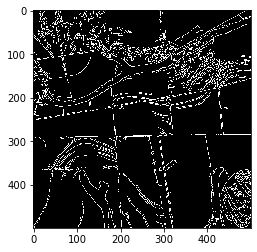

In [11]:
edges = cv2.Canny(img8,10,50)
plt.imshow(edges,cmap = 'gray')
plt.show()


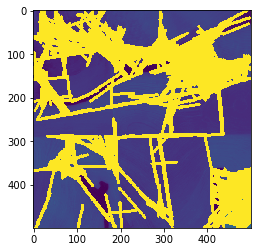

In [13]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

# Draw the lines on the  image
lines_edges = cv2.addWeighted(img8, 0.8, line_image, 1, 0)
plt.imshow(lines_edges)
plt.show()

In [14]:
_rho = 1  # distance resolution in pixels of the Hough grid
_theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments



lines = cv2.HoughLines(edges, _rho, _theta, threshold)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + 1000 * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img8, (x1, y1), (x2, y2), (0, 0, 255), 2)